<a href="https://colab.research.google.com/github/kobayashley/CPSC340TutorialsNotes/blob/main/Tutorial_T2A_Jan_21st.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial T2A - 01/21

TA: Rubia Guerra

## Admin


*   Tutorials are **not** mandatory
*   You can attend any scheduled tutorial during the week
*   If you can, please fill out this short survey after the tutorial is done: https://forms.gle/sVQKmZhiva3i45UF9
*   If I can't answer your question or you are still confused about something, please post it on ed
* Starting next week, we will use the queue system: https://queue.students.cs.ubc.ca/CS340



## Agenda


*   Review code solutions for A1: Q6.2, Q6.3 and Q6.4
*   (Very) brief review of probability
*   Bonus: a quick look on scikit-learn's Github

## Assignment 1: Decision Trees

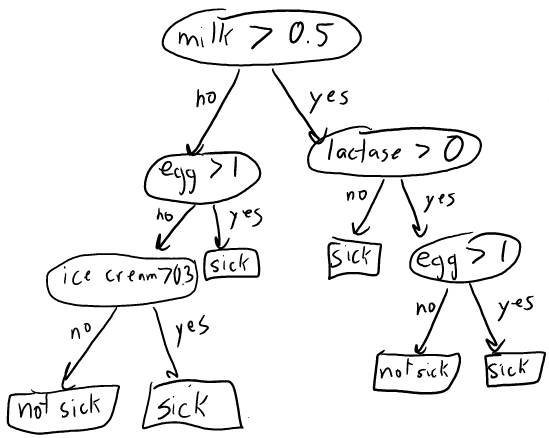

### Dataset

*   Longitude and latitude data for 400 cities in the US
*   Class label: “red” state (1) or a “blue” state (0) in the 2012 election

### 6.2 Decision Stump Implementation

The file decision_stump.py contains the class DecisionStumpEquality which finds the best decision stump using the equality rule and then makes predictions using that rule. Instead of discretizing the data and using a rule based on testing an equality for a single feature, we want to check whether a feature is above or below a threshold and split the data accordingly (this is a more sane approach, which we discussed in class). Create a DecisionStumpErrorRate class to do this, and report the updated error you obtain by using inequalities instead of discretizing and testing equality. Also submit the generated figure of the classification boundary.

In [ ]:
import numpy as np
import utils


class DecisionStumpEquality:

    def __init__(self):
        pass


    def fit(self, X, y):
        N, D = X.shape

        # Get an array with the number of 0's, number of 1's, etc.
        count = np.bincount(y)    
        
        # Get the index of the largest value in count.  
        # Thus, y_mode is the mode (most popular value) of y
        y_mode = np.argmax(count) 

        self.splitSat = y_mode
        self.splitNot = None
        self.splitVariable = None
        self.splitValue = None

        # If all the labels are the same, no need to split further
        if np.unique(y).size <= 1:
            return

        # If we were just to predict the most common label
        minError = np.sum(y != y_mode)

        # Loop over features looking for the best split
        X = np.round(X)

        for d in range(D):
            for n in range(N):
                # Choose value to equate to
                value = X[n, d]

                # Find most likely class for each split
                y_sat = utils.mode(y[X[:,d] == value])
                '''
                Note that the line below does not imply that this
                method can only handle binary classification tasks.
                As it is, this model would certainly perfom badly for multiple
                classes, but the same algorithm could handle a multiclass
                problem.
                '''
                y_not = utils.mode(y[X[:,d] != value])

                # Make predictions
                y_pred = y_sat * np.ones(N)
                y_pred[X[:, d] != value] = y_not

                # Compute error
                errors = np.sum(y_pred != y)

                # Compare to minimum error so far
                if errors < minError:
                    # This is the lowest error, store this value
                    minError = errors
                    self.splitVariable = d
                    self.splitValue = value
                    self.splitSat = y_sat
                    self.splitNot = y_not

    def predict(self, X):

        M, D = X.shape
        X = np.round(X)

        if self.splitVariable is None:
            return self.splitSat * np.ones(M)

        yhat = np.zeros(M)

        for m in range(M):
            if X[m, self.splitVariable] == self.splitValue:
                yhat[m] = self.splitSat
            else:
                yhat[m] = self.splitNot

        return yhat

In [ ]:
class DecisionStumpErrorRate:

    def __init__(self):
        pass

    def fit(self, X, y):
        """ YOUR CODE HERE FOR Q2.1 """
        N, D = X.shape

        # Get an array with the number of 0's, number of 1's, etc.
        count = np.bincount(y)    
        
        # Get the index of the largest value in count.  
        # Thus, y_mode is the mode (most popular value) of y
        y_mode = np.argmax(count) 
        
        self.splitSat = y_mode
        self.splitNot = None
        self.splitVariable = None
        self.splitValue = None

        # If all the labels are the same, no need to split further
        if np.unique(y).size <= 1:
            return
            
        # If we were just to predict the most common label
        minError = np.sum(y != y_mode)

        # Loop over features looking for the best split
        for d in range(D):
            for n in range(N):
                # Choose value to equate to
                value = X[n, d]

                # Find most likely class for each split
                y_sat = utils.mode(y[X[:,d] > value])
                y_not = utils.mode(y[X[:,d] <= value])

                # Make predictions
                y_pred = y_sat * np.ones(N)
                y_pred[X[:, d] <= value] = y_not

                # Compute error
                errors = np.sum(y_pred != y)

                # Compare to minimum error so far
                if errors < minError:
                    # This is the lowest error, store this value
                    minError = errors
                    self.splitVariable = d
                    self.splitValue = value
                    self.splitSat = y_sat
                    self.splitNot = y_not

    def predict(self, X):
        """ YOUR CODE HERE FOR Q2.1 """
        splitVariable = self.splitVariable
        splitValue = self.splitValue
        splitSat = self.splitSat
        splitNot = self.splitNot

        M, D = X.shape

        if splitVariable is None:
            return splitSat * np.ones(M)

        yhat = np.zeros(M)

        for m in range(M):
            if X[m, splitVariable] > splitValue:
                yhat[m] = splitSat
            else:
                yhat[m] = splitNot

        return yhat

### 6.3 Decision Stump Info Gain Implementation

In decision_stump.py, create a DecisionStumpInfoGain class that fits using the information gain criterion
discussed in lecture. Report the updated error you obtain, and submit the classification boundary figure.

#### What is entropy?

This is a quick intuition. Take a look on the variables below.

| Things my cat did today | Things my dog did today |
|---|---|
| eating | chasing balls |
| eating | watching birds |
| eating | catching butterflies |
| eating | barking at the mailman |
| sleeping | getting into the trash |
| sleeping | begging for food |

Which one is more predictable? Which one is more uncertain? Entropy is way to measure the minimum average encoding size that we need to describe something.

* Low entropy $\rightarrow$ more predictability
* High entropy $\rightarrow$ more uncertainty

A gentle reference: https://machinelearningmastery.com/what-is-information-entropy/

$$E(x)=-\sum_{i=1}^n p(x_i)\log p(x_i)$$


In [ ]:
"""
A helper function that computes the entropy of the 
discrete distribution p (stored in a 1D numpy array).
The elements of p should add up to 1.
This function ensures lim p-->0 of p log(p) = 0
which is mathematically true, but numerically results in NaN
because log(0) returns -Inf.
"""
def entropy(p):
    plogp = 0*p # initialize full of zeros
    plogp[p>0] = p[p>0]*np.log(p[p>0]) # only do the computation when p>0
    return -np.sum(plogp)

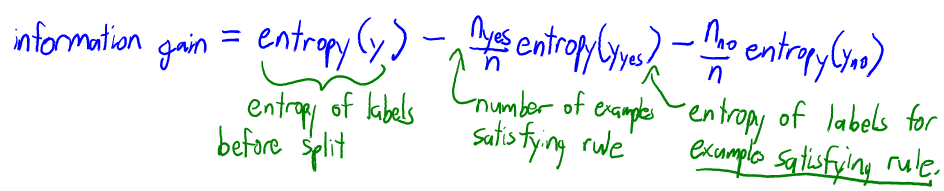

In [ ]:
# This is not required, but one way to simplify the code is 
# to have this class inherit from DecisionStumpErrorRate.
# Which methods (init, fit, predict) do you need to overwrite?
class DecisionStumpInfoGain(DecisionStumpErrorRate):

    def fit(self, X, y, split_features=None):
                
        N, D = X.shape

        # Address the trivial case where we do not split
        count = np.bincount(y)

        # Compute total entropy (needed for information gain)
        p = count/np.sum(count); # Convert counts to probabilities
        entropyTotal = entropy(p)

        maxGain = 0
        self.splitVariable = None
        self.splitValue = None
        self.splitSat = np.argmax(count)
        self.splitNot = None

        # Check if labels are not all equal
        if np.unique(y).size <= 1:
            return

        if split_features is None:
            split_features = range(D)

        for d in split_features:
            # To avoid going over the same value more than once
            thresholds = np.unique(X[:,d])
            for value in thresholds[:-1]:
                # Count number of class labels where the feature is greater than threshold
                y_vals = y[X[:,d] > value]
                count1 = np.bincount(y_vals, minlength=len(count))
                count0 = count - count1
                                
                # Compute infogain
                p1 = count1/np.sum(count1)
                H1 = entropy(p1)
                p0 = count0/np.sum(count0)
                H0 = entropy(p0)

                prob1 = np.sum(X[:,d] > value)/N
                prob0 = 1 - prob1

                infoGain = entropyTotal - prob1*H1 - prob0*H0

                # assert infoGain >= 0

                # Compare to minimum error so far
                if infoGain > maxGain:
                    # This is the highest information gain, store this value
                    maxGain = infoGain
                    splitVariable = d
                    splitValue = value
                    splitSat = np.argmax(count1)
                    splitNot = np.argmax(count0)
    
        # if infoGain > 0: # if there's an actual split. rather than everything going to one side. there are other ways of checking this condition...
        self.splitVariable = splitVariable
        self.splitValue = splitValue
        self.splitSat = splitSat
        self.splitNot = splitNot


### 6.4 Constructing Decision Trees

Once your DecisionStumpInfoGain class is finished, running python main.py -q 6.4 will fit a decision tree of depth 2 to the same dataset (which results in a lower training error). Look at how the decision tree is stored and how the (recursive) predict function works. Using the splits from the fitted depth-2 decision tree, write a hard-coded version of the predict function that classifies one example using simple if/else statements (see the Decision Trees lecture). Save your code in a new file called simple_decision.py (in the code directory).

In [ ]:
# decision_tree.py
import numpy as np
from decision_stump import DecisionStumpErrorRate

class DecisionTree:

    def __init__(self, max_depth, stump_class=DecisionStumpErrorRate):
        self.max_depth = max_depth
        self.stump_class = stump_class
    

    def fit(self, X, y):
        # Fits a decision tree using greedy recursive splitting
        N, D = X.shape
        
        # Learn a decision stump
        splitModel = self.stump_class()
        splitModel.fit(X, y)

        if self.max_depth <= 1 or splitModel.splitVariable is None:
            # If we have reached the maximum depth or the decision stump does
            # nothing, use the decision stump

            self.splitModel = splitModel
            self.subModel1 = None
            self.subModel0 = None
            return
        
        # Fit a decision tree to each split, decreasing maximum depth by 1
        j = splitModel.splitVariable
        value = splitModel.splitValue

        # Find indices of examples in each split
        splitIndex1 = X[:,j] > value
        splitIndex0 = X[:,j] <= value

        # Fit decision tree to each split
        self.splitModel = splitModel
        self.subModel1 = DecisionTree(self.max_depth-1, stump_class=self.stump_class)
        self.subModel1.fit(X[splitIndex1], y[splitIndex1])
        self.subModel0 = DecisionTree(self.max_depth-1, stump_class=self.stump_class)
        self.subModel0.fit(X[splitIndex0], y[splitIndex0])


    def predict(self, X):
        M, D = X.shape
        y = np.zeros(M)

        # GET VALUES FROM MODEL
        splitVariable = self.splitModel.splitVariable
        splitValue = self.splitModel.splitValue
        splitSat = self.splitModel.splitSat

        if splitVariable is None:
            # If no further splitting, return the majority label
            y = splitSat * np.ones(M)

        # the case with depth=1, just a single stump.
        elif self.subModel1 is None:
            return self.splitModel.predict(X)

        else:
            # Recurse on both sub-models
            j = splitVariable
            value = splitValue

            splitIndex1 = X[:,j] > value
            splitIndex0 = X[:,j] <= value

            y[splitIndex1] = self.subModel1.predict(X[splitIndex1])
            y[splitIndex0] = self.subModel0.predict(X[splitIndex0])

        return y
        


In [ ]:
# original main.py
elif question == "6.4":
    with open(os.path.join('..','data','citiesSmall.pkl'), 'rb') as f:
        dataset = pickle.load(f)

    X = dataset["X"]
    y = dataset["y"]

    model = DecisionTree(max_depth=2, stump_class=DecisionStumpInfoGain)
    model.fit(X, y)

    y_pred = model.predict(X)
    error = np.mean(y_pred != y)

    print("Error: %.3f" % error)
        
    utils.plotClassifier(model, X, y)

    fname = os.path.join("..", "figs", "q6_4_decisionBoundary.pdf")
    plt.savefig(fname)
    print("\nFigure saved as '%s'" % fname)

In [ ]:
elif question == "6.4":
    # 1. Load citiesSmall dataset    
    with open(os.path.join('..','data','citiesSmall.pkl'), 'rb') as f:
              dataset = pickle.load(f)

    X = dataset["X"]
    y = dataset["y"]

    # 2. Evaluate decision tree
    model = DecisionTree(max_depth=2,stump_class=DecisionStumpInfoGain)
    model.fit(X, y)

    y_pred = model.predict(X)
    error = np.mean(y_pred != y)

    print("Error: %.3f" % error)

    utils.plotClassifier(model, X, y)

    fname = os.path.join("..", "figs", "q6_4_decisionBoundary.pdf")
    plt.savefig(fname)
    print("\nFigure saved as '%s'" % fname)

    # Print values so we can create a hard-coded version of our decision tree
    def print_stump(stump):
        print("Splitting on feature %s at threshold %f. >: %s, <=: %s" % (stump.splitVariable, stump.splitValue, stump.splitSat, stump.splitNot))

    print("Top:")
    print_stump(model.splitModel)
    print(">")
    print_stump(model.subModel1.splitModel)
    print("<=")
    print_stump(model.subModel0.splitModel)

In [ ]:
# simple_decision.py
def predict(X):
    if X[0] > -80.305106:
        if X[1] > 36.453576: # this "if" statement is optional
            y = 0
        else:
            y = 0
    else:
        if X[0] > 37.669007:
            y = 0
        else:
            y = 1
    return y


##  A very brief review of probability
For a more comprehensive review, see Notes on Probability, by Prof. Mark Schmidt: https://www.cs.ubc.ca/~schmidtm/Courses/Notes/probability.pdf

### Warm up

- If $A\bot B$, then $P(A\cap B)=$
- If $A \bot B$, then $P(A|B)=$
- Bayes Theorem: $P(A|B)=$
- From Bayes Theorem we have: $P(A\cap B)=$
- If $B$ can take only 2 values (0 and 1), write $P(A)$ in terms of conditional probabilities:
  $P(A)=$
- Generalize the equation above to a case where B can take either of b values:
  $P(A)=$

### Review

**Marginal probability:**
The probability of an event irrespective of the outcomes of other random variables, e.g. P(A). If the random variable is independent, then it is the probability of the event directly, otherwise, if the variable is dependent upon other variables, then the marginal probability is the probability of the event summed over all outcomes for the dependent variables, called the sum rule.

**Joint probability:** Probability of two (or more) simultaneous events, e.g. $P(A\;\text{and}\;B)$, $P(A\cap B)$ or $P(A, B)$. The joint probability is often described in terms of events A and B from two dependent random variables, e.g. X and Y. The joint probability is often summarized as just the outcomes, e.g. A and B.

Importantly, the joint probability is symmetrical, meaning that:

$$P(A, B) = P(B, A)$$

**Conditional probability:** Probability of one (or more) event given the occurrence of another event, e.g. $P(A\;\text{given}\;B)$ or $P(A | B)$. The conditional probability is the probability of one event given the occurrence of another event, often described in terms of events A and B from two dependent random variables e.g. X and Y.

The conditional probability is **not** symmetrical; for example:

$$P(A | B) \neq P(B | A)$$


The **joint probability** can be calculated using the **conditional probability**; for example:

$$P(A, B) = P(A | B) * P(B)$$ (product rule)

The **conditional probability** can be calculated using the **joint probability**; for example:

$$P(A | B) = \frac{P(A, B)}{P(B)}$$

Specifically, one conditional probability can be calculated using the other conditional probability; for example:

$$P(A|B) = P(B|A) * \frac{P(A)}{P(B)}$$

The reverse is also true; for example:
$$P(B|A) = P(A|B) * \frac{P(B)}{P(A)}$$

This formulation is known as **Bayes Theorem**.

<small>Adapted from: 
- https://machinelearningmastery.com/bayes-theorem-for-machine-learning/
- https://machinelearningmastery.com/joint-marginal-and-conditional-probability-for-machine-learning/
</small>

### Warm up answers

- If $A\bot B$, then $$P(A\cap B)=P(A)∗P(B)$$
- If $A \bot B$, then $$P(A|B)=P(A)$$
- Bayes Theorem: $$P(A|B)=\frac{P(A∩B)}{P(B)}=\frac{P(B|A)P(A)}{P(B)}$$
- From Bayes Theorem we have: $$P(A\cap B)= P(A|B)P(B) = P(B|A)P(A)$$
- If $B$ can take only 2 values (0 and 1), write $P(A)$ in terms of conditional probabilities:
  $$P(A) = P (A|B = 0)P (B = 0) + P (A|B = 1)P(B = 1)$$
- Generalize the equation above to a case where B can take either of b values:
  $$P(A) = \sum_{i=1}^b P(A|B = i)P(B = i)$$

### Bayes Theorem: an intuition

<small> Adapted from this [r/ELI5 answer](https://www.reddit.com/r/explainlikeimfive/comments/1ztuzg/eli5bayes_theorem/).</small>

Suppose that you know the following facts about a particular train:

- $P(A)$: Prior probability, e.g. the train is late 10% of the time

- $P(B)$: Evidence, e.g. it rains 15% of the time.

- $P(B|A)$: Likelihood, e.g., 40% of the time the train is late, it was late because it was raining.

Using the Bayes Theorem, you can compute $P(A|B)$ (posterior): if it's raining, what percentage of the time will the train be late?

$$\text{Posterior} = \frac{\text{Likelihood} * \text{Prior}}{\text{Evidence}}$$

It's basically reversing the posterior probability - and you need to know the "prior probability" of how often the train is late and how often it rains in order to do that.

Another example*: 
- Prior P(A): 44% of the states are red. 
- Evidence P(B): 24% of the states are part of the midwest.
- Likelihood P(B|A): Of the states that voted red, 30% were located in the midwest.
- Posterior P(A|B): Given that the state is in the midwest, how likely it is that the state voted red?

<small>*this data is not real</small>

It is often the case that we do not have access to the denominator P(B) directly:
$$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$$

The Bayes Theorem provides a formulation that we can use based on the alternate calculation of P(B), described below:

$$P(A|B) = \frac{P(B|A)P(A)}{P(B|A)P(A) + P(B|\neg A)P(\neg A)}$$

<small>References:
- https://machinelearningmastery.com/bayes-theorem-for-machine-learning/
- https://betterexplained.com/articles/an-intuitive-and-short-explanation-of-bayes-theorem/</small>

#### Why is Naïve Bayes naïve?

Naïve Bayes is called naïve because it assumes that each input variable is independent. This is a strong assumption and unrealistic for real data; however, the technique is very effective on a large range of complex problems.

<small>Read more here: https://www.sciencedirect.com/topics/mathematics/naive-bayes</small>

## Bonus: how does scikit-learn code looks like?

[KNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) on [GitHub](https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/neighbors/_base.py).

## Next week

*   Please complete the survey at https://forms.gle/d4T3PJpQN7cAVt8W8
*   Current plans: going over the code for Assignment 2
